

1.
생산자물가상승률

2.
경제심리지수

3.
통화량(m1협의통화)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib as mpl
from datetime import datetime
import seaborn as sns
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False # 음수 깨짐 방지
pd.set_option('display.max_rows', 100) #row 조절
pd.set_option('display.max_columns', 100) #column 조절
#plot 차트 설정
plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [2]:
os.chdir("C:\\data\\open")

### 1.생산자물가상승률

In [3]:
reg_land_rate = pd.read_csv("지역별_지가변동률.csv", parse_dates=["Unnamed: 0"])

#column 이름 변경
reg_land_rate.rename(columns = {'Unnamed: 0' : 'DATE'}, inplace = True)

reg_land_rate['DATE'] = reg_land_rate['DATE'].dt.strftime('%Y/%m')

reg_land_rate

,DATE,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005/01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
1,2005/02,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2,2005/03,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
3,2005/04,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
4,2005/05,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020/10,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
190,2020/11,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
191,2020/12,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004
192,2021/01,0.311,0.408,0.281,0.342,0.297,0.305,0.386,0.184,0.818,0.308,0.219,0.247,0.205,0.196,0.295,0.183,0.121,-0.012


세종시에 결측치 발생으로 평균 값으로 세팅한다

In [4]:

# 결측치 여부 확인
reg_land_rate.isna().sum()

#평균값
#land_price_rate['세종[%]'].mean()
reg_land_rate['세종[%]'] = reg_land_rate['세종[%]'].fillna('0.505')

#날짜로 INDEX 설정하기
reg_land_rate = reg_land_rate.set_index('DATE')
reg_land_rate

,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
DATE,,,,,,,,,,,,,,,,,,
2005/01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,0.505,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
2005/02,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,0.505,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2005/03,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,0.505,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
2005/04,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,0.505,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
2005/05,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,0.505,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/10,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
2020/11,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
2020/12,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004


<AxesSubplot:title={'center':'지역별 지가변동률'}, xlabel='DATE'>

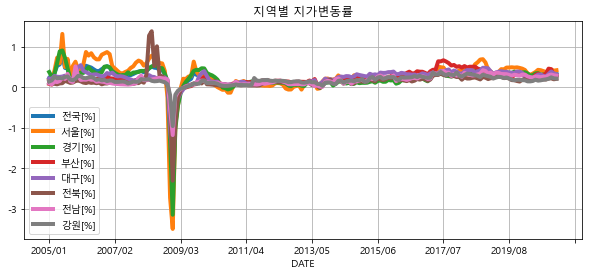

In [5]:
reg_land_rate[['전국[%]','서울[%]','경기[%]','부산[%]','대구[%]','전북[%]','전남[%]','강원[%]']].plot(title = '지역별 지가변동률')

2009년대에는 리만브라더스 사태로 부동산 가격 변동이 심하여 2013.01월 ~ 2020.12월 까지 측정하였다

In [6]:
reg_land_rate[['전국[%]','서울[%]','경기[%]','부산[%]','대구[%]','전북[%]','전남[%]','강원[%]']].iloc[96:192]

,전국[%],서울[%],경기[%],부산[%],대구[%],전북[%],전남[%],강원[%]
DATE,,,,,,,,
2013/01,0.031,-0.058,0.037,0.136,0.103,0.097,0.071,0.119
2013/02,0.066,0.055,0.029,0.132,0.104,0.087,0.071,0.111
2013/03,0.109,0.105,0.101,0.129,0.125,0.110,0.103,0.122
2013/04,0.132,0.157,0.106,0.163,0.141,0.096,0.097,0.144
2013/05,0.130,0.152,0.133,0.142,0.150,0.051,0.076,0.121
2013/06,0.105,0.097,0.089,0.202,0.176,0.051,0.030,0.126
2013/07,0.019,-0.039,0.050,0.062,0.044,0.024,0.042,0.082
2013/08,0.001,-0.026,-0.019,0.006,0.092,-0.013,0.015,0.078
2013/09,0.076,0.145,0.037,0.080,0.131,0.041,0.011,0.034


<AxesSubplot:title={'center':'지역별 지가변동률'}, xlabel='DATE'>

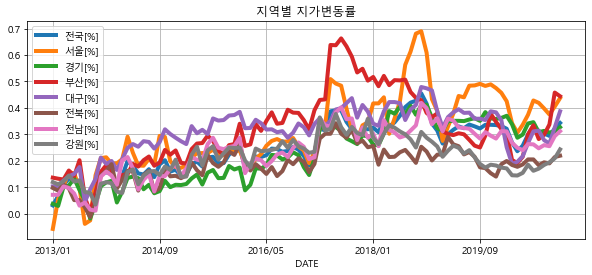

In [7]:
reg_land_rate[['전국[%]','서울[%]','경기[%]','부산[%]','대구[%]','전북[%]','전남[%]','강원[%]']].iloc[96:192].plot(title = '지역별 지가변동률')

### 1. 생산자물가지수

In [8]:
produce_price_idx = pd.read_csv("(new)생산자물가지수.csv", encoding='cp949', thousands = ',')

In [9]:
# 결측치 여부 확인
produce_price_idx.isna().sum()

#평균값
produce_price_idx['2008/01'].mean()
produce_price_idx['2008/01'] = produce_price_idx['2008/01'].fillna(96.1)

produce_price_idx['2020/11'].mean()
produce_price_idx['2020/11'] = produce_price_idx['2020/11'].fillna(106.3)
produce_price_idx['2020/12'].mean()
produce_price_idx['2020/12'] = produce_price_idx['2020/12'].fillna(107.13)


In [10]:
produce_price_idx.iloc[0:1]

,통계표,항목명1,단위,변환,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,2011/07,2011/08,2011/09,2011/10,...,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11,2020/12,2021/01,2021/02,2021/03
0,18.1.2.1 생산자물가지수,한국,2010=100,원자료,96.1,97.03,97.75,98.57,99.3,100.84,102.39,101.77,101.67,100.22,97.03,93.21,92.9,92.18,90.94,91.67,93.11,94.14,93.42,94.55,94.04,93.83,94.96,94.96,96.41,96.92,98.06,99.19,100.02,100.33,100.22,100.74,101.36,101.46,101.87,103.42,106.53,107.33,108.62,109.29,109.62,109.37,109.51,109.66,109.74,109.64,...,104.9,104.86,104.64,104.36,103.95,104.03,104.5,105.2,105.32,105.21,105.27,105.71,106.15,106.11,106.25,106.55,106.59,107.08,107.56,107.87,107.5,106.75,106.23,106.12,106.22,106.6,106.9,107.02,106.72,106.72,106.97,107.03,106.78,106.63,106.93,107.32,106.97,106.02,105.1,105.13,105.67,105.9,106.43,106.64,106.21,106.3,107.13,NaN,NaN,NaN


생산자물가지수 역시 2013.01 ~ 2020.12월까지로 측정하였다

In [11]:
produce_price_idx.iloc[:1,64:160]

,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11,2020/12
0,108.22,108.97,108.53,108.19,107.82,107.8,107.78,108.08,107.97,107.59,107.37,107.62,107.91,108.04,108.0,107.83,107.81,107.86,107.95,107.83,107.44,106.69,106.36,105.32,104.03,104.1,103.98,103.94,104.01,103.96,103.57,102.94,102.48,101.78,101.38,101.14,100.59,100.59,100.53,100.78,100.9,101.14,101.03,101.12,101.36,101.66,102.11,103.01,104.5,104.9,104.86,104.64,104.36,103.95,104.03,104.5,105.2,105.32,105.21,105.27,105.71,106.15,106.11,106.25,106.55,106.59,107.08,107.56,107.87,107.5,106.75,106.23,106.12,106.22,106.6,106.9,107.02,106.72,106.72,106.97,107.03,106.78,106.63,106.93,107.32,106.97,106.02,105.1,105.13,105.67,105.9,106.43,106.64,106.21,106.3,107.13


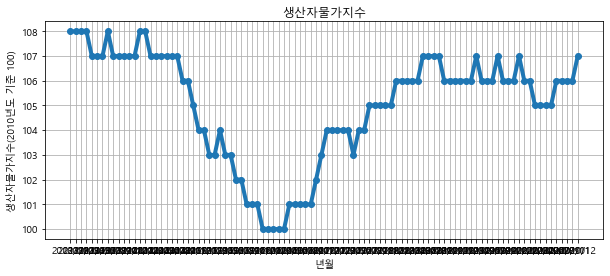

In [12]:
xcols =list(produce_price_idx.iloc[:,64:160].columns.values)
ycols = []

ycols = produce_price_idx.iloc[0, 64:160].values.tolist()
ycols= list(map(int, ycols))
ycols

plt.plot(xcols,ycols,marker="o")

plt.title("생산자물가지수")
plt.xlabel("년월")
plt.ylabel("생산자물가지수(2010년도 기준 100)")
plt.show()

비율(%)로 데이터 값 전처리하였다.

In [13]:
#produce_price_idx.iloc[:1,64:160] = produce_price_idx.iloc[:1,64:160].sub(100).div(100)
produce_price_idx.iloc[:1,64:160] = produce_price_idx.iloc[:1,64:160].sub(100).div(100)
produce_price_idx.iloc[:1,64:160] 

,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11,2020/12
0,0.0822,0.0897,0.0853,0.0819,0.0782,0.078,0.0778,0.0808,0.0797,0.0759,0.0737,0.0762,0.0791,0.0804,0.08,0.0783,0.0781,0.0786,0.0795,0.0783,0.0744,0.0669,0.0636,0.0532,0.0403,0.041,0.0398,0.0394,0.0401,0.0396,0.0357,0.0294,0.0248,0.0178,0.0138,0.0114,0.0059,0.0059,0.0053,0.0078,0.009,0.0114,0.0103,0.0112,0.0136,0.0166,0.0211,0.0301,0.045,0.049,0.0486,0.0464,0.0436,0.0395,0.0403,0.045,0.052,0.0532,0.0521,0.0527,0.0571,0.0615,0.0611,0.0625,0.0655,0.0659,0.0708,0.0756,0.0787,0.075,0.0675,0.0623,0.0612,0.0622,0.066,0.069,0.0702,0.0672,0.0672,0.0697,0.0703,0.0678,0.0663,0.0693,0.0732,0.0697,0.0602,0.051,0.0513,0.0567,0.059,0.0643,0.0664,0.0621,0.063,0.0713


In [14]:
loo = produce_price_idx.iloc[:1,64:159]

loo


,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11
0,0.0822,0.0897,0.0853,0.0819,0.0782,0.078,0.0778,0.0808,0.0797,0.0759,0.0737,0.0762,0.0791,0.0804,0.08,0.0783,0.0781,0.0786,0.0795,0.0783,0.0744,0.0669,0.0636,0.0532,0.0403,0.041,0.0398,0.0394,0.0401,0.0396,0.0357,0.0294,0.0248,0.0178,0.0138,0.0114,0.0059,0.0059,0.0053,0.0078,0.009,0.0114,0.0103,0.0112,0.0136,0.0166,0.0211,0.0301,0.045,0.049,0.0486,0.0464,0.0436,0.0395,0.0403,0.045,0.052,0.0532,0.0521,0.0527,0.0571,0.0615,0.0611,0.0625,0.0655,0.0659,0.0708,0.0756,0.0787,0.075,0.0675,0.0623,0.0612,0.0622,0.066,0.069,0.0702,0.0672,0.0672,0.0697,0.0703,0.0678,0.0663,0.0693,0.0732,0.0697,0.0602,0.051,0.0513,0.0567,0.059,0.0643,0.0664,0.0621,0.063


In [18]:
looz = produce_price_idx.iloc[:1,65:160]

looz

,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11,2020/12
0,0.0897,0.0853,0.0819,0.0782,0.078,0.0778,0.0808,0.0797,0.0759,0.0737,0.0762,0.0791,0.0804,0.08,0.0783,0.0781,0.0786,0.0795,0.0783,0.0744,0.0669,0.0636,0.0532,0.0403,0.041,0.0398,0.0394,0.0401,0.0396,0.0357,0.0294,0.0248,0.0178,0.0138,0.0114,0.0059,0.0059,0.0053,0.0078,0.009,0.0114,0.0103,0.0112,0.0136,0.0166,0.0211,0.0301,0.045,0.049,0.0486,0.0464,0.0436,0.0395,0.0403,0.045,0.052,0.0532,0.0521,0.0527,0.0571,0.0615,0.0611,0.0625,0.0655,0.0659,0.0708,0.0756,0.0787,0.075,0.0675,0.0623,0.0612,0.0622,0.066,0.069,0.0702,0.0672,0.0672,0.0697,0.0703,0.0678,0.0663,0.0693,0.0732,0.0697,0.0602,0.051,0.0513,0.0567,0.059,0.0643,0.0664,0.0621,0.063,0.0713


In [37]:

z = 1
valuez = loo['2013/01']
for key, value in looz.items():
    
    print((lambda n,m:n-m)(value[0],valuez))
    #(lambda n,m:n-m)(value[0],valuez)
    valuez = value[0]



0    0.0075
Name: 2013/01, dtype: float64
-0.004399999999999973
-0.003400000000000042
-0.0037000000000000366
-0.0001999999999999641
-0.0001999999999999641
0.002999999999999975
-0.0010999999999999899
-0.003799999999999956
-0.0021999999999999936
0.0025000000000000022
0.0028999999999999165
0.0013000000000001066
-0.00040000000000006697
-0.001700000000000021
-0.0001999999999999641
0.0004999999999999727
0.0009000000000000397
-0.0012000000000000483
-0.0039000000000000007
-0.007500000000000007
-0.0032999999999999835
-0.010400000000000055
-0.012899999999999925
0.0006999999999999368
-0.0011999999999999095
-0.00040000000000006003
0.0007000000000000756
-0.0005000000000001115
-0.0039000000000000076
-0.006299999999999955
-0.0045999999999999375
-0.0070000000000000305
-0.004000000000000056
-0.002399999999999949
-0.005499999999999972
0.0
-0.0006000000000000224
0.0025000000000000005
0.0012000000000000448
0.002399999999999949
-0.001099999999999995
0.0009000000000000345
0.002399999999999949
0.002999999999

In [27]:
valuez

0.07129999999999996

상관관계 분석

In [29]:
reg_land_rate_all = reg_land_rate[['전국[%]']].iloc[96:192,0]
#reg_land_rate_all = reg_land_rate[['전국[%]']].iloc[96:100,0]
#reg_land_rate_all

In [30]:
produce_price_idx_rt = produce_price_idx.iloc[:1,64:160]
#produce_price_idx_rt = produce_price_idx.iloc[:1,64:68]
produce_price_idx_rt

,2013/01,2013/02,2013/03,2013/04,2013/05,2013/06,2013/07,2013/08,2013/09,2013/10,2013/11,2013/12,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,2014/10,2014/11,2014/12,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,2015/07,2015/08,2015/09,2015/10,2015/11,2015/12,2016/01,2016/02,2016/03,2016/04,2016/05,2016/06,2016/07,2016/08,2016/09,2016/10,2016/11,2016/12,2017/01,2017/02,2017/03,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,2020/11,2020/12
0,0.0822,0.0897,0.0853,0.0819,0.0782,0.078,0.0778,0.0808,0.0797,0.0759,0.0737,0.0762,0.0791,0.0804,0.08,0.0783,0.0781,0.0786,0.0795,0.0783,0.0744,0.0669,0.0636,0.0532,0.0403,0.041,0.0398,0.0394,0.0401,0.0396,0.0357,0.0294,0.0248,0.0178,0.0138,0.0114,0.0059,0.0059,0.0053,0.0078,0.009,0.0114,0.0103,0.0112,0.0136,0.0166,0.0211,0.0301,0.045,0.049,0.0486,0.0464,0.0436,0.0395,0.0403,0.045,0.052,0.0532,0.0521,0.0527,0.0571,0.0615,0.0611,0.0625,0.0655,0.0659,0.0708,0.0756,0.0787,0.075,0.0675,0.0623,0.0612,0.0622,0.066,0.069,0.0702,0.0672,0.0672,0.0697,0.0703,0.0678,0.0663,0.0693,0.0732,0.0697,0.0602,0.051,0.0513,0.0567,0.059,0.0643,0.0664,0.0621,0.063,0.0713


In [31]:
#행렬 바꾸기
produce_price_idx_rt = produce_price_idx_rt.transpose()
produce_price_idx_rt = produce_price_idx_rt.iloc[:,0]
#produce_price_idx_rt

In [32]:
df = pd.concat([reg_land_rate_all, produce_price_idx_rt], axis = 1)  #열방향 연결, 데이터프레임

In [33]:
print(type(reg_land_rate_all))

<class 'pandas.core.series.Series'>


In [34]:
print(type(produce_price_idx_rt))

<class 'pandas.core.series.Series'>


In [35]:
#column 이름 변경
df.columns = ['전국_지변율','생산자물가지수']

df

,전국_지변율,생산자물가지수
DATE,,
2013/01,0.031,0.0822
2013/02,0.066,0.0897
2013/03,0.109,0.0853
2013/04,0.132,0.0819
2013/05,0.130,0.0782
2013/06,0.105,0.0780
2013/07,0.019,0.0778
2013/08,0.001,0.0808
2013/09,0.076,0.0797


피어슨 상관계수로 데이터 상관관계를 분석하였다

In [ ]:
corr = df.corr(method = 'pearson') 
corr

피어슨의 상관계수는 일반적으로,

  값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

  값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

  값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

  값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

  값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

  값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

  값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계



In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')



### 2. 경제심리지수

In [ ]:
ecoc_esi_idx = pd.read_csv("(new)경제심리지수.csv", encoding='cp949', thousands = ',')

In [ ]:
ecoc_esi_idx = ecoc_esi_idx.iloc[:1,4:]
# 결측치 여부 확인
ecoc_esi_idx.isna().sum()

#행렬바꾸기
ecoc_esi_idx_rt = ecoc_esi_idx.transpose()


In [ ]:
#ecoc_esi_idx_rt

In [ ]:
#reg_land_rate_all

In [ ]:
df = pd.concat([reg_land_rate_all, ecoc_esi_idx_rt], axis = 1)  #열방향 연결, 데이터프레임
#column 이름 변경
df.columns = ['전국_지변율','경제심리지수']


In [ ]:
corr = df.corr(method = 'pearson') 
corr


In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')


* 지변율과 경제심리지수의 상관관계는 낮았다

### 3.통화

In [ ]:
currency_m1_idx = pd.read_csv("(new)m1협의통화(전년동기대비증감률).csv", encoding='cp949', thousands = ',')

In [ ]:
# 결측치 여부 확인
currency_m1_idx.iloc[:1,4:].isna().sum()
#비율(%)로 맞추기
currency_m1_idx.iloc[:1,4:] = currency_m1_idx.iloc[:1,4:].div(100)
currency_m1_idx = currency_m1_idx.iloc[:1,4:]

In [ ]:

#행렬바꾸기
currency_m1_idx_rt = currency_m1_idx.transpose()

In [ ]:
currency_m1_idx_rt

In [ ]:
df = pd.concat([reg_land_rate_all, currency_m1_idx_rt], axis = 1)  #열방향 연결, 데이터프레임

In [ ]:

#column 이름 변경
df.columns = ['전국_지변율','m1협의통화']
corr = df.corr(method = 'pearson') 
corr

In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

* 지변율과 통화와의 상관관계는 낮았다

# 4.